<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## **Generate Noisy Data**

In [2]:
def linear_fun(x, alpha, beta):
  return alpha*x+beta

In [3]:
def rational_fun(x, alpha, beta):
  return alpha/(1+beta*x)

In [4]:
alpha = np.random.rand()
beta = np.random.rand()
noise = np.random.normal(0,1,101)
print(alpha, beta)

0.7714729509289554 0.4930559409886507


In [5]:
k = [*range(0, 101, 1)]
x = np.array([x/100 for x in k])
y = alpha*x + beta + noise

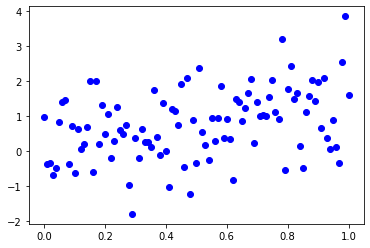

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')

In [7]:
def objective_linear(params):
  alpha, beta = params
  return np.sum(((alpha*x+beta)-y)**2)

In [8]:
def objective_rational(params):
  alpha, beta = params
  return np.sum(((alpha/(1+x*beta))-y)**2)

**Conjugate Gradient Descent**

Linear Approximant

In [9]:
initial = [0,0]
result1_l = optimize.minimize(fun=objective_linear, x0=initial,method='CG', tol=0.001) 
result1_l

     fun: 84.7148387656513
     jac: array([-1.90734863e-06, -9.53674316e-07])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 2
    njev: 6
  status: 0
 success: True
       x: array([1.25962743, 0.1398298 ])

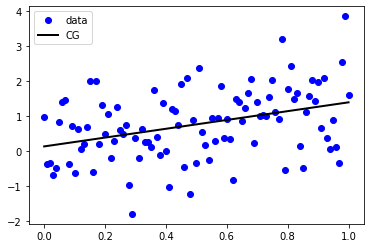

In [10]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result1_l.x[0],result1_l.x[1]), '-k', lw=2, label='CG')
ax.legend()

Rational Approximant



In [11]:
initial = [0,0]
result1_r = optimize.minimize(fun=objective_rational, x0=initial,method='CG', tol=0.001) 
result1_r

     fun: 85.26158020057785
     jac: array([0.00095463, 0.00026131])
 message: 'Optimization terminated successfully.'
    nfev: 116
     nit: 12
    njev: 29
  status: 0
 success: True
       x: array([ 0.41872596, -0.75426087])

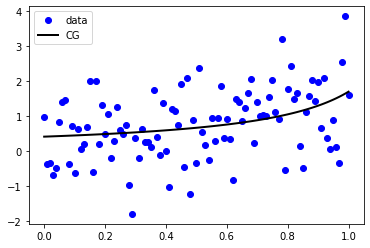

In [12]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result1_r.x[0],result1_r.x[1]), '-k', lw=2, label='CG')
ax.legend()

**Newton's Method**

Linear Approximant

In [13]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_linear, 0.001)
result2_l = optimize.minimize(fun=objective_linear, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result2_l

     fun: 84.71487206485004
     jac: array([7.80298137e-05, 1.15709128e-04])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 83
    nhev: 0
     nit: 2
    njev: 91
  status: 2
 success: False
       x: array([1.26059924, 0.13884447])

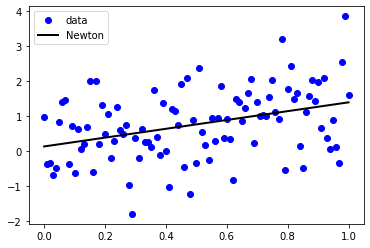

In [14]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result2_l.x[0],result2_l.x[1]), '-k', lw=2, label='Newton')
ax.legend()

Rational Approximant

In [15]:
initial = [0,0]
fprime = lambda x: optimize.approx_fprime(x, objective_rational, 0.001)
result2_r = optimize.minimize(fun=objective_rational, x0=initial,method='Newton-CG', tol=0.001, jac=fprime) 
result2_r

     fun: 85.26304644782287
     jac: array([-7.98292774e-05, -7.22632687e-03])
 message: 'Optimization terminated successfully.'
    nfev: 14
    nhev: 0
     nit: 9
    njev: 52
  status: 0
 success: True
       x: array([ 0.41527384, -0.75764272])

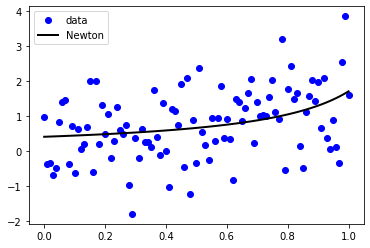

In [16]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result2_r.x[0],result2_r.x[1]), '-k', lw=2, label='Newton')
ax.legend()

**Levenberg-Marquardt algorithm**

Linear Approximant

In [17]:
result3_l = optimize.curve_fit(linear_fun, x, y, method='lm')[0]
result3_l

array([1.25962748, 0.13982978])

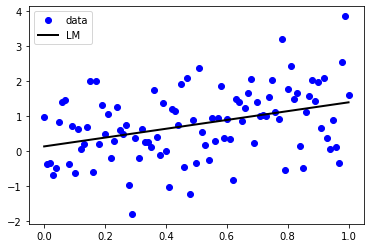

In [18]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result3_l[0],result3_l[1]), '-k', lw=2, label='LM')
ax.legend()

Rational Approximant

In [19]:
result3_r = optimize.curve_fit(rational_fun, x, y, method='lm')[0]
result3_r

array([ 0.41872769, -0.75425757])

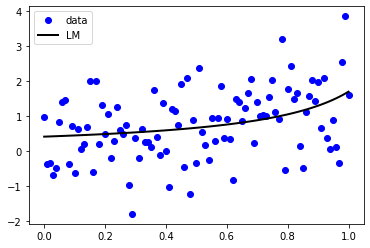

In [20]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result3_r[0],result3_r[1]), '-k', lw=2, label='LM')
ax.legend()

**Gradient Descent**

Linear Approximant

In [21]:
def GradientDescentLinear(x, y, alpha, beta, lr, tol=0.001):
  for i in range(100):
    der_alpha = np.sum(2*x*(alpha*x+beta-y))
    der_beta = np.sum(2*(alpha*x+beta-y))
    alpha = alpha - lr*der_alpha
    beta = beta - lr*der_beta
    if np.abs(lr*der_alpha) < tol and np.abs(lr*der_beta) < tol:
      return alpha, beta, i
  return alpha, beta, i

In [22]:
result4_l = GradientDescentLinear(x, y, 0, 0, 0.001)
print(result4_l)

(1.0242099885700848, 0.26599629964737337, 99)


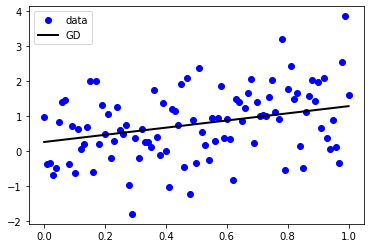

In [23]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, linear_fun(x, result4_l[0],result4_l[1]), '-k', lw=2, label='GD')
ax.legend()

Rational Approximant

In [24]:
def GradientDescentRational(x, y, alpha, beta, lr, tol=0.001):
  for i in range(100):
    t = (1 + beta*x)
    der_alpha = np.sum(2*((alpha/t) - y)/t)
    der_beta = np.sum(2*alpha*x*(t*y - alpha)/(t**3))
    alpha = alpha - lr*der_alpha
    beta = beta - lr*der_beta
    if np.abs(lr*der_alpha) < tol and np.abs(lr*der_beta) < tol:
      return alpha, beta, i
  return alpha, beta, i

In [25]:
result4_r = GradientDescentRational(x, y, 0, 0, 0.001)
print(result4_r)

(0.42572589846643605, -0.747337502980981, 60)


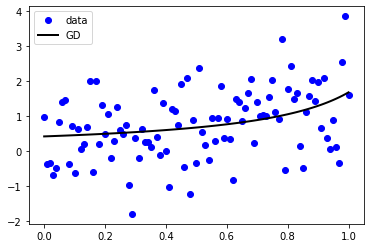

In [26]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, 'ob', label='data')
ax.plot(x, rational_fun(x, result4_r[0],result4_r[1]), '-k', lw=2, label='GD')
ax.legend()

**Comparison**

Linear Approximant

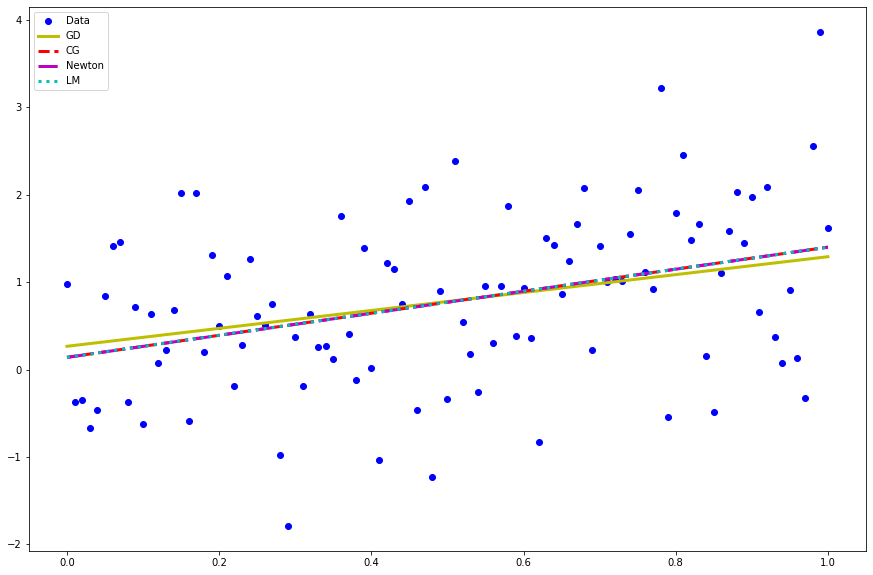

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x, y, 'ob', label='Data')
ax.plot(x, linear_fun(x, result4_l[0],result4_l[1]), '-y', lw=3, label='GD')
ax.plot(x, linear_fun(x, result1_l.x[0],result1_l.x[1]), '--r', lw=3, label='CG')
ax.plot(x, linear_fun(x, result2_l.x[0],result2_l.x[1]), '-.m', lw=3, label='Newton')
ax.plot(x, linear_fun(x, result3_l[0],result3_l[1]), ':c', lw=3, label='LM')
ax.legend()

Rational Approximant

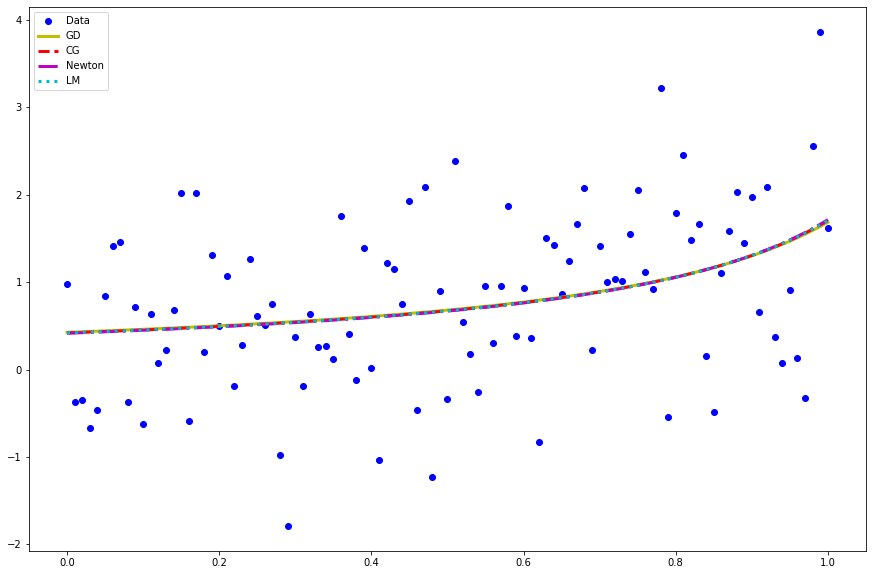

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(x, y, 'ob', label='Data')
ax.plot(x, rational_fun(x, result4_r[0],result4_r[1]), '-y', lw=3, label='GD')
ax.plot(x, rational_fun(x, result1_r.x[0],result1_r.x[1]), '--r', lw=3, label='CG')
ax.plot(x, rational_fun(x, result2_r.x[0],result2_r.x[1]), '-.m', lw=3, label='Newton')
ax.plot(x, rational_fun(x, result3_r[0],result3_r[1]), ':c', lw=3, label='LM')
ax.legend()